In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_gcp = pd.read_csv('data/gcp_trascription_3.csv')

In [3]:
df_gcp = (
    df_gcp
    .rename(columns = {
        'Unnamed: 0': 'id'
    }, inplace = False)
)
df_gcp['id'] = df_gcp['id'].apply(lambda x: x.split('/')[-1][20:])

In [4]:
df_aws = pd.read_csv('data/aws_transcription.csv')

In [5]:
df_aws = (
    df_aws
    .rename(columns = {
        'Unnamed: 0': 'id'
    }, inplace = False)
)

In [6]:
df_cloud = df_gcp.merge(df_aws, on='id', suffixes=['_gcp','_aws'])

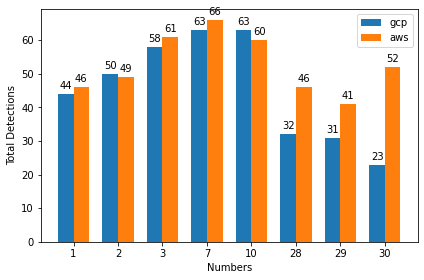

In [7]:
labels = ['1', '2', '3', '7', '10', '28', '29', '30']
data = [
    df_cloud[['1_gcp', '2_gcp', '3_gcp', '7_gcp', '10_gcp', '28_gcp', '29_gcp', '30_gcp']].sum().to_list(),
    df_cloud[['1_aws', '2_aws', '3_aws', '7_aws', '10_aws', '28_aws', '29_aws', '30_aws']].sum().to_list(),

]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data[0], width, label='gcp')
rects2 = ax.bar(x + width/2, data[1], width, label='aws')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Detections')
ax.set_xlabel('Numbers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [14]:
df_gcp_norm = pd.read_csv('data/gcp_trascription_normalized.csv')

In [15]:
df_gcp_norm = (
    df_gcp_norm
    .rename(columns = {
        'Unnamed: 0': 'id'
    }, inplace = False)
)
df_gcp_norm['id'] = df_gcp_norm['id'].apply(lambda x: x.split('/')[-1][20:])

In [17]:
df_clouds2 = df_cloud.merge(df_gcp_norm, on='id', how='inner').rename(columns = {
    'id': 'id_gcp_norm',
    '1': '1_gcp_norm',
    '2': '2_gcp_norm',
    '3': '3_gcp_norm',
    '7': '7_gcp_norm',
    '10': '10_gcp_norm',
    '28': '28_gcp_norm',
    '29': '29_gcp_norm',
    '30': '30_gcp_norm',
    'time': 'time_gcp_norm'}, inplace = False)

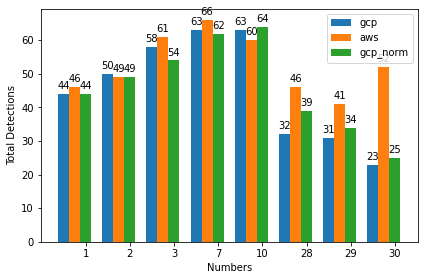

In [18]:
labels = ['1', '2', '3', '7', '10', '28', '29', '30']
data = [
    df_clouds2[['1_gcp', '2_gcp', '3_gcp', '7_gcp', '10_gcp', '28_gcp', '29_gcp', '30_gcp']].sum().to_list(),
    df_clouds2[['1_aws', '2_aws', '3_aws', '7_aws', '10_aws', '28_aws', '29_aws', '30_aws']].sum().to_list(),
    df_clouds2[['1_gcp_norm', '2_gcp_norm', '3_gcp_norm', '7_gcp_norm', '10_gcp_norm', '28_gcp_norm', '29_gcp_norm', '30_gcp_norm']].sum().to_list(),
]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width*2, data[0], width, label='gcp')
rects2 = ax.bar(x - width, data[1], width, label='aws')
rects3 = ax.bar(x, data[2], width, label='gcp_norm')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total Detections')
ax.set_xlabel('Numbers')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()